In [18]:
import numpy as np
import matplotlib.pyplot as plt
def Invariant(x,y,alpha=2/3,beta=4/3,sigma=1,gamma=1):
    return sigma *x -gamma*np.log(x)+beta*y-alpha*np.log(y)

def ExplicitEulerIntegration(x,y,dt,alpha=2/3,beta=4/3,sigma=1,gamma=1):
    xNext=x+(alpha*x-beta*x*y)*dt
    yNext=y+(sigma*y*x-gamma*y)*dt
    return xNext,yNext

def ImplicitEulerIntegration(xn,yn,dt,alpha=2/3,beta=4/3,sigma=1,gamma=1):
    ax=(1-alpha*dt)*sigma*dt
    bx=-((1-alpha*dt)*(1+gamma*dt)+sigma*dt*xn+beta*dt*yn)
    cx=(1+gamma*dt)*xn

    ay=(1-gamma*dt)*beta*dt
    by=((1-alpha*dt)*(1+gamma*dt)-beta*dt*yn-sigma*dt*xn)
    cy=-(1-alpha*dt)*yn



    xTildeNext=SolveQuadrticPolynomial(ax,bx,cx)
    yTildeNext=SolveQuadrticPolynomial(ay,by,cy)
    

    xTildeNext=min(xTildeNext, key=lambda x:abs(x-xn))
    yTildeNext=min(yTildeNext, key=lambda y:abs(y-yn))
    
   
    xNext=xn+(alpha*xTildeNext-beta*xTildeNext*yTildeNext)*dt
    yNext=yn+(sigma*yTildeNext*xTildeNext-gamma*yTildeNext)*dt
    return xNext, yNext

def SymplecticEulerIntegration(xn,yn,dt,alpha=2/3,beta=4/3,sigma=1,gamma=1):
    # [explicit,inplicit ]
    xTildeNext=[xn*(1+dt*(alpha-(beta*yn)/(1-dt*(sigma*xn-gamma)))), xn/(1-dt*(alpha-beta*yn))]
    yTildeNext=[yn*(1+dt*(sigma*xn/(1-dt*(alpha-beta*yn))-yn)),yn/(1-dt*(sigma*xn-gamma))]
    xNext=xTildeNext[0]
    yNext=yTildeNext[1]
    
    #xTildeNext=min(xTildeNext, key=lambda x:abs(x-xn))
    #yTildeNext=min(yTildeNext, key=lambda y:abs(y-yn))

    #xNext=xn+(alpha*xTildeNext-beta*xTildeNext*yTildeNext)*dt
    #yNext=yn+(sigma*yTildeNext*xTildeNext-gamma*yTildeNext)*dt
    return xNext,yNext

def LogisticGrowthModelAnalytic(t,x0=0.1,dt=5,r=0.1,K=2):
    t0=K/((K/x0)-1)
    xt=K/(1+((K/x0)-1)*np.exp(-r*(t-t0)))
    return(xt)

def LogisticEquationNumericalExplicit(xn,dt,r,K):
    return xn+r*xn*(1-xn/K)*dt    # xn+r*(xn-(xn**2)/K)*dt

def LogisticEquationNumericalImplicit(xn,dt,r,K):
    a=r*dt/K
    b=1-r*dt
    c=-xn      
    xTildeNext=SolveQuadrticPolynomial(a,b,c)
    xTildeNext=min(xTildeNext, key=lambda x:abs(x-xn))
    return xn+r*xTildeNext*(1-xTildeNext/K)*dt

def LogisticGrowthModelNumerical(function,t,dt,r=0.1,K=2,x0=0.1):
    nIterations=int(t/dt)
    xn=x0
    for i in range(nIterations):
        xn=function(xn,dt,r,K)
    return xn 

def LotkaVolterraModel(function,dt=0.05,totalTime=20,alpha=2/3,beta=4/3,sigma=1,gamma=1,xn=1,yn=1):
   
    nIterations=int(totalTime/dt)
    iterations=np.arange(0,totalTime,dt)

    X=np.zeros(nIterations)
    Y=np.zeros(nIterations)
    I=np.zeros(nIterations)
    for i in range(nIterations):
        X[i]=xn
        Y[i]=yn
        xn,yn=function(xn,yn,dt,alpha=alpha,beta=beta,sigma=sigma,gamma=gamma)
        I[i]=Invariant(xn,yn)
        
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    ax[0].plot(iterations,X,label="Preys")
    ax[0].plot(iterations,Y,label="Predators")
    ax[0].set_ylabel('Number of animals')
    ax[0].set_xlabel('time')
    ax[0].legend()


    ax[1].plot(iterations,I,label="I")
    ax[1].plot([iterations[0],iterations[-1]],[I[0],I[0]],'--',color='k',label="Starting I")
    ax[1].set_ybound([0,3])
    ax[1].set_ylabel('I(t)')
    ax[1].set_xlabel('t')


    ax[2].plot(X,Y)
    ax[2].annotate('', xy=(X[-1], Y[-1]), xytext=(X[-2], Y[-2]),
                arrowprops=dict( arrowstyle='->', mutation_scale=30))

    ax[2].set_xlabel('x preys')
    ax[2].set_ylabel('y predatores')

def PlotLogisticGrowthModel(function,dts=[0.05,5],r=0.1,K=2,x0=0.1,totalTime=100):
    allN=[]
    allTs=[]
    for dt in dts:
        ts=np.arange(0,totalTime,dt)
        N=[]
        for t in ts: 
            N.append(LogisticGrowthModelNumerical(function,t,dt,r=r,K=K,x0=x0))
        allN.append(N)
        allTs.append(ts)

  
    NAnalytical=LogisticGrowthModelAnalytic(np.arange(0,totalTime,0.01),dt=0.01,r=r,K=K,x0=x0)

    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    fig.suptitle('x0='+str(x0)+' r='+str(r)+' K='+str(K))

    ax1.set_title("Numerical")
    for i in range (len(dts)):
        ax1.plot(allTs[i],allN[i],linestyle='-', marker='o',label ='dt='+str(dts[i]))
    ax1.plot(np.arange(0,totalTime,0.01),NAnalytical,'--',color='black',label='Analytical')
    ax1.legend()

    ax2.plot(np.arange(0,totalTime,0.01),NAnalytical)
    ax2.set_title("Analytical")

def SolveQuadrticPolynomial(a,b,c):
    if b**2-4*a*c <0:
        print (b,a,c)
        print("complex")
    sol1=(-b+np.sqrt(b**2-4*a*c))/(2*a)
    sol2=(-b-np.sqrt(b**2-4*a*c))/(2*a)
    return [sol1,sol2]



Chapter 14

14.3

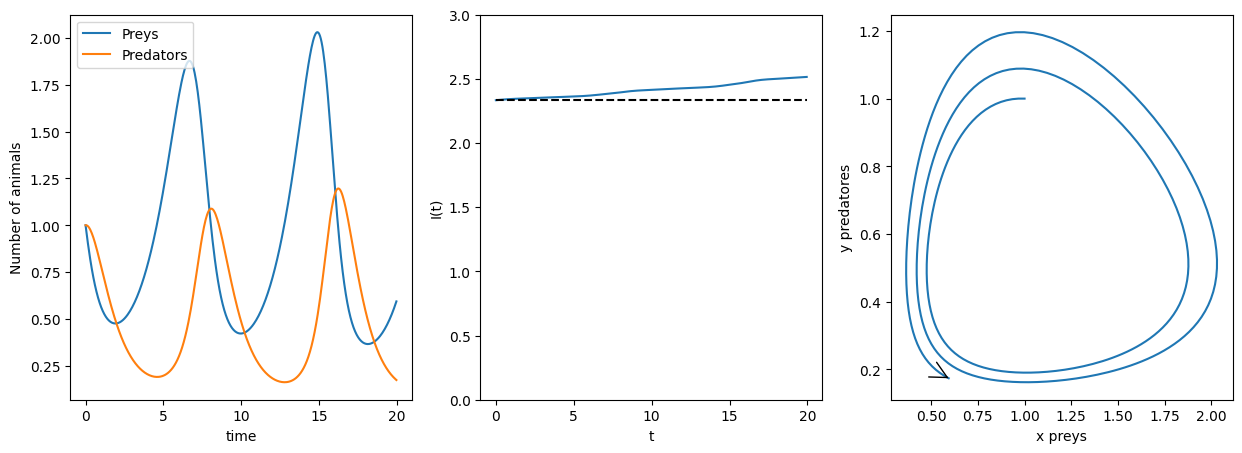

In [4]:
LotkaVolterraModel(ExplicitEulerIntegration)

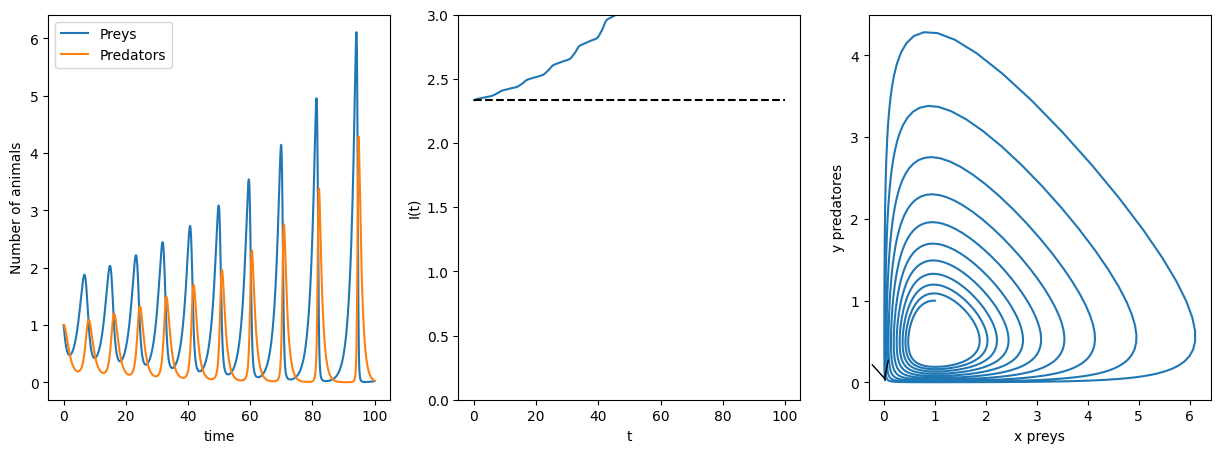

In [5]:
LotkaVolterraModel(ExplicitEulerIntegration,totalTime=100)

14.4

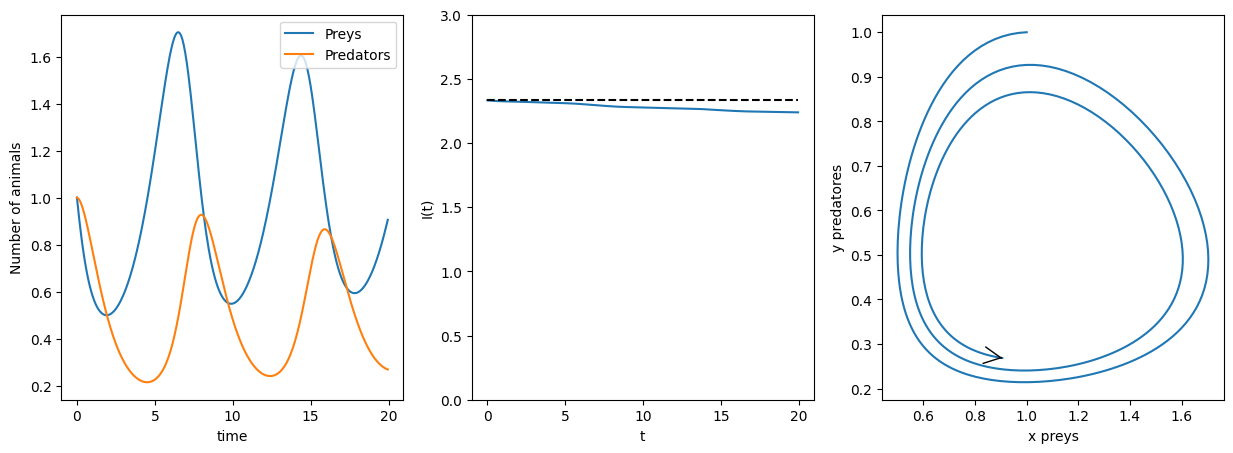

In [6]:
LotkaVolterraModel(ImplicitEulerIntegration)

In [110]:
14.5

14.5

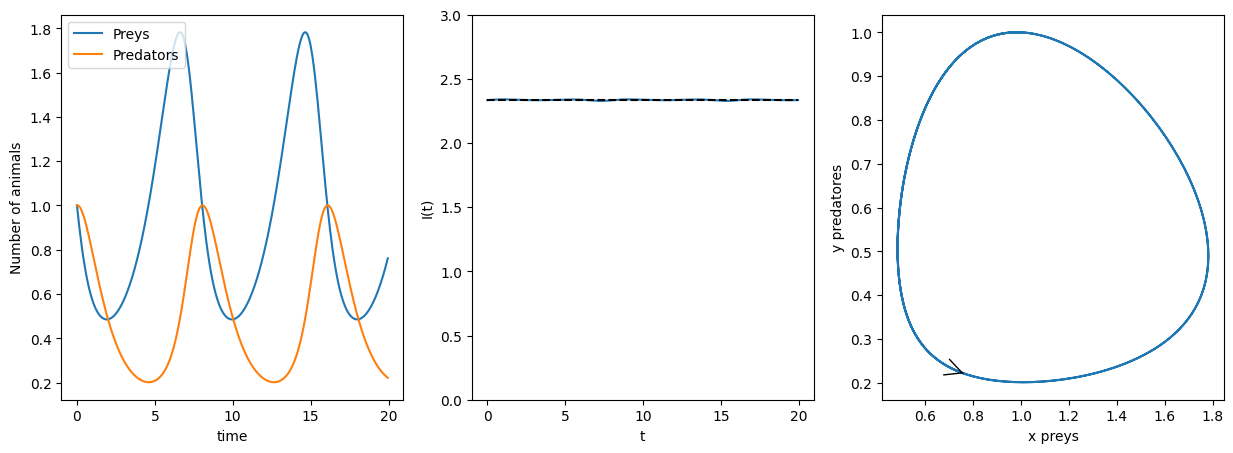

In [80]:
LotkaVolterraModel(SymplecticEulerIntegration)

14.7

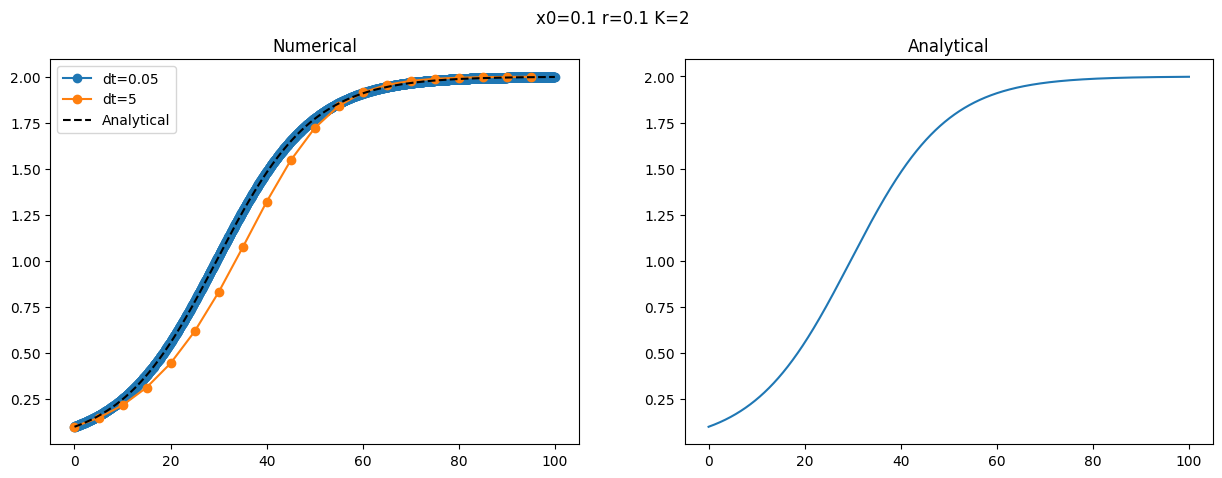

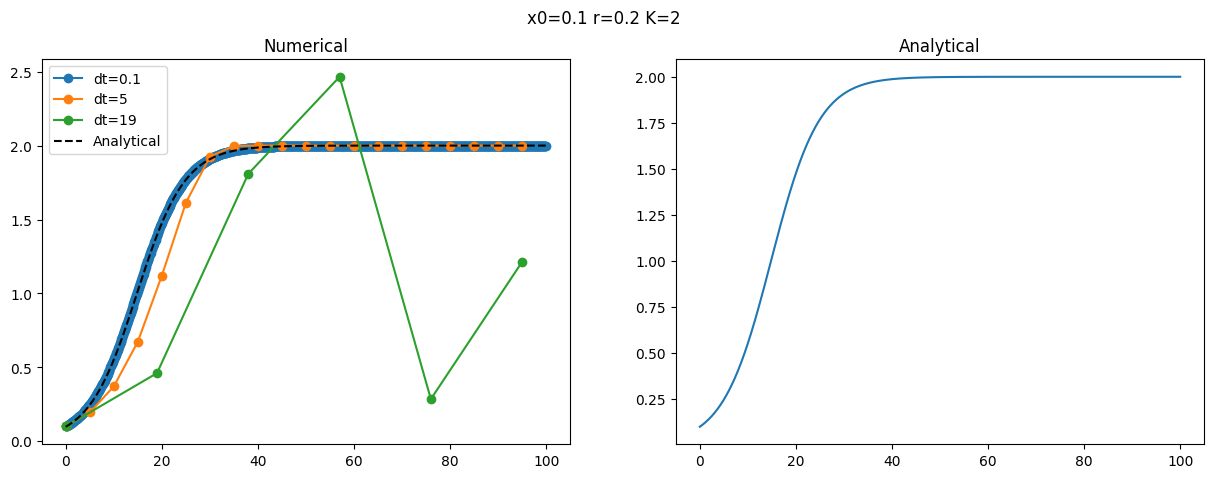

In [24]:
PlotLogisticGrowthModel(LogisticEquationNumericalExplicit)
#Hint: Choose Δt ≪ r−1. Why?
PlotLogisticGrowthModel(LogisticEquationNumericalExplicit,r=0.2,dts=[0.1,5,19])


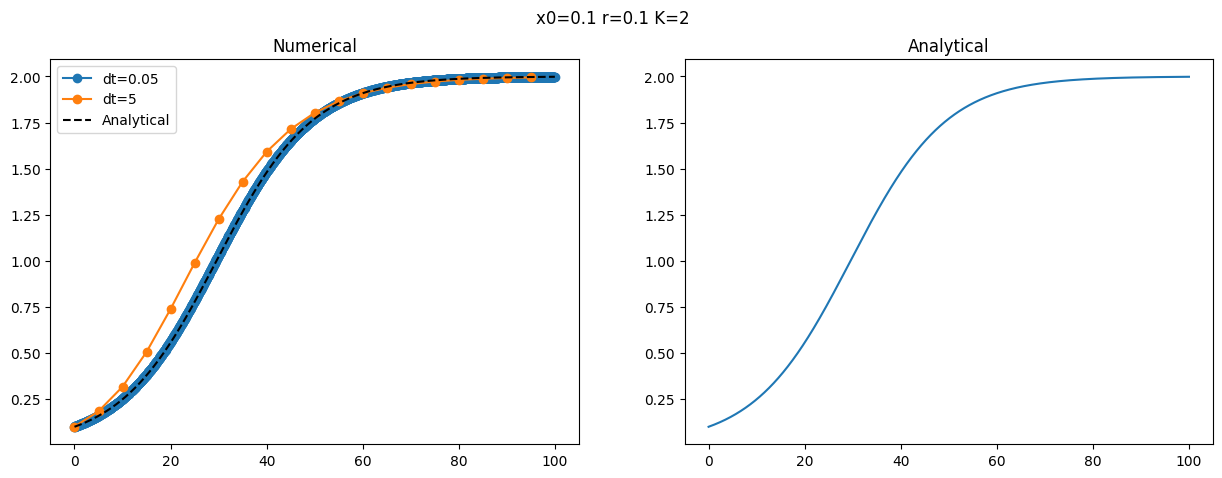

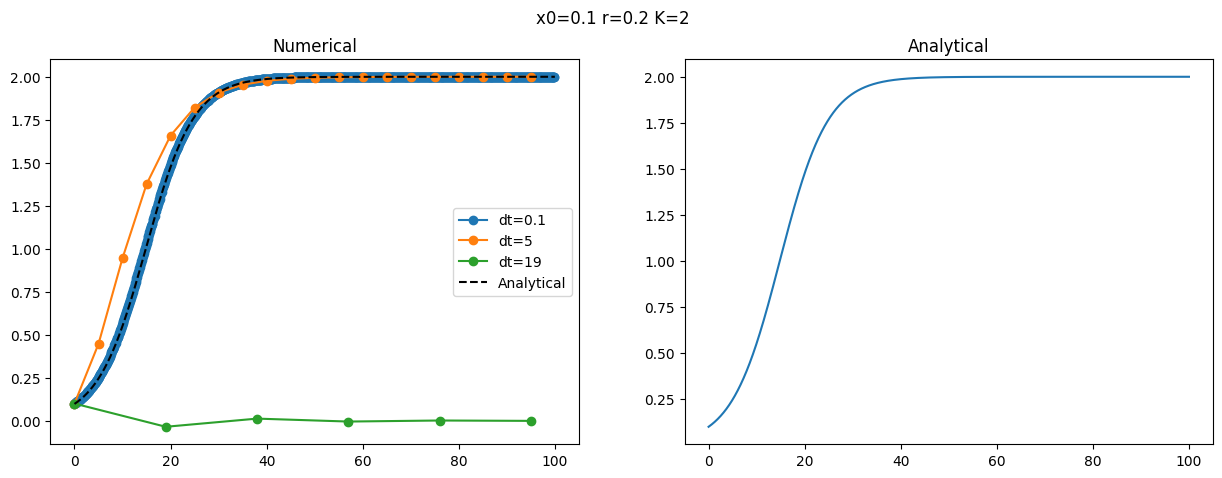

In [23]:
PlotLogisticGrowthModel(LogisticEquationNumericalImplicit) 
PlotLogisticGrowthModel(LogisticEquationNumericalImplicit,r=0.2,dts=[0.1,5,19]) 


